In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def resumen(datos):
    return print('Forma:\n', datos.shape,'\n\n',
                 'Columnas:\n', datos.columns,'\n\n',
                 'Tipos:\n', datos.dtypes,'\n\n',
                 'Datos nulos:\n', datos.isnull().sum(),'\n\n',
                 'Cabecera:\n', datos.head(10),'\n\n',
                 'Últimos datos:\n', datos.tail(10),'\n\n',
                 'Estadísticos:\n', datos.describe([0.05,0.25,0.5,0.75,0.95])
                )
def truncar(numero, decimales = 0):
    return np.trunc(numero*10**decimales)/(10**decimales)

In [3]:
def metadata(titulo, ejex, ejey):
    plt.title(titulo, fontsize = 60, fontweight='bold')
    plt.xlabel(ejex, fontsize = 35)
    plt.ylabel(ejey, fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return
def cifras_signif(i, cifras):
    return str('{:g}'.format(float('{:.{p}g}'.format(i, p = cifras))))

In [4]:
datos_juntos = pd.read_csv(
    'C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Datos_juntos.csv',
    delimiter = '\t',
    decimal = '.',
    na_values = -9999,
    encoding = 'ascii'
    )

In [5]:
resumen(datos_juntos)

Forma:
 (29915, 134) 

 Columnas:
 Index(['Momento', 'TSS1', 'TSS2', 'TS1', 'TS2', 'TS3', 'TS4', 'TS_QG', 'U',
       'DIR',
       ...
       'e_s 1', 'VPD 1', 'e_s 2', 'VPD 2', 'e_s 3', 'VPD 3', 'e_s 4', 'VPD 4',
       'e_s Ts', 'VPD Ts'],
      dtype='object', length=134) 

 Tipos:
 Momento            float64
TSS1               float64
TSS2               float64
TS1                float64
TS2                float64
TS3                float64
TS4                float64
TS_QG              float64
U                  float64
DIR                float64
PP                 float64
TA1                float64
HR1                float64
TA2                float64
HR2                float64
TA3                float64
HR3                float64
TA4                float64
HR4                float64
QG1                float64
QG2                float64
WET                float64
RG                 float64
PAR                float64
TSH1               float64
HS1                float64
GH1       

In [6]:
vpd_neg = datos_juntos[(datos_juntos['VPD Ts'] < 0)]
precipitacion = vpd_neg[(vpd_neg['PP'] > 0)]
noche = vpd_neg[(vpd_neg['RG'] <= 1)]
dia = vpd_neg[(vpd_neg['RG'] > 1)]
noche_mojado = noche[(noche['WET'] > 0)]
noche_seco = noche[(noche['WET'] == 0)]
dia_mojado = dia[(dia['WET'] > 0)]
dia_seco = dia[(dia['WET'] == 0)]
print('Negativos ' + str(vpd_neg['RG'].count())
     + '\n Dia ' + str(dia['RG'].count())
     + '\n Noche ' + str(noche['RG'].count())
     + '\n Dia seco ' + str(dia_seco['RG'].count())
     + '\n Dia mojado ' + str(dia_mojado['RG'].count())
     + '\n Noche seco ' + str(noche_seco['RG'].count())
     + '\n Noche mojado ' + str(noche_mojado['RG'].count()) 
     + '\n Precipitacion ' + str(precipitacion['RG'].count())
     )

Negativos 10098
 Dia 4345
 Noche 5753
 Dia seco 2501
 Dia mojado 1844
 Noche seco 1733
 Noche mojado 4020
 Precipitacion 109


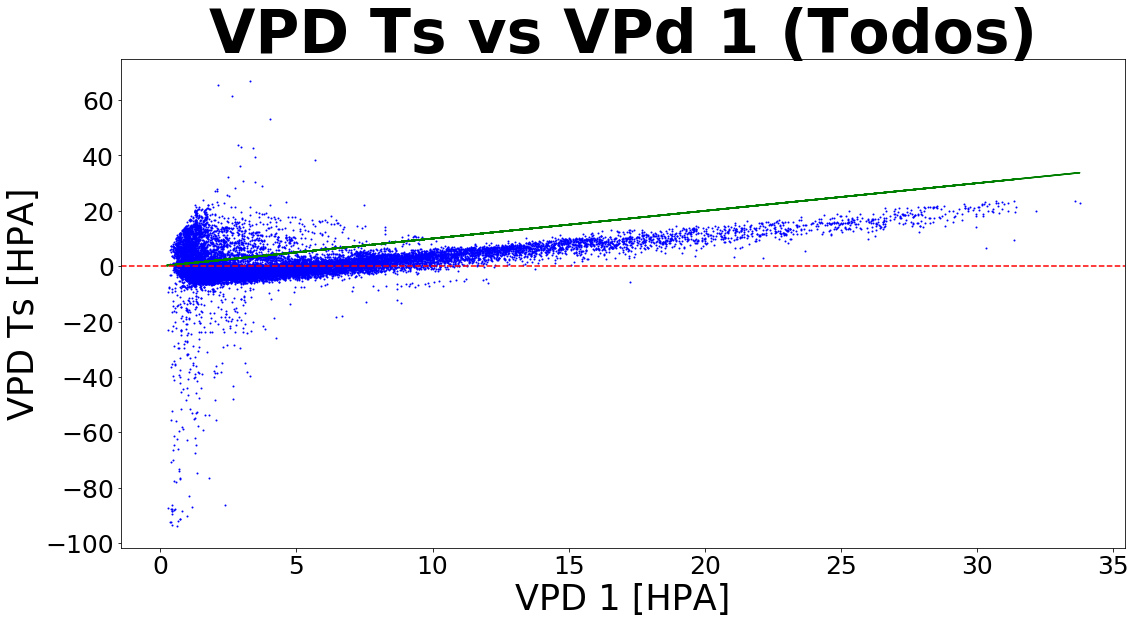

In [28]:
plt.figure(figsize = (18, 9))
plt.plot(datos_juntos['VPD 1'], datos_juntos['VPD Ts'], 'bo', markersize = 1)
plt.plot(datos_juntos['VPD 1'], datos_juntos['VPD 1'], 'g-')
metadata('VPD Ts vs VPd 1 (Todos)', 'VPD 1 [HPA]', 'VPD Ts [HPA]')
plt.axhline(0, ls = '--', color = 'red')

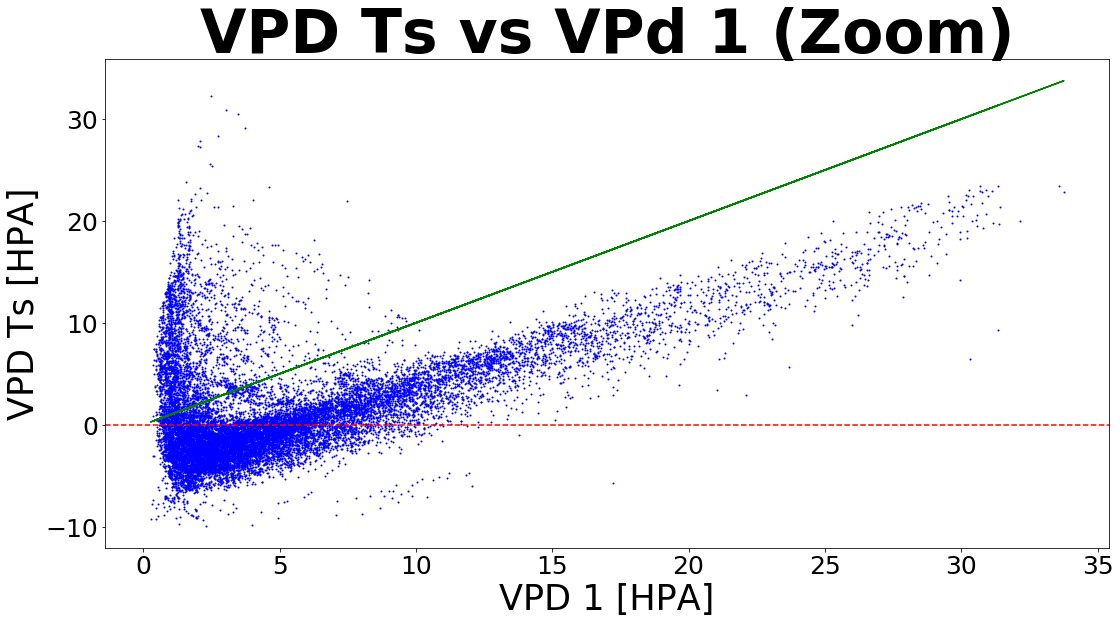

In [8]:
eje = datos_juntos[(datos_juntos['VPD Ts'] > -10) & (datos_juntos['VPD Ts'] < 35)]
plt.figure(figsize = (18, 9))
plt.plot(eje['VPD 1'], eje['VPD Ts'], 'bo', markersize = 1)
plt.plot(eje['VPD 1'], eje['VPD 1'], 'g-')
metadata('VPD Ts vs VPd 1 (Zoom)', 'VPD 1 [HPA]', 'VPD Ts [HPA]')
plt.axhline(0, ls = '--', color = 'red')

C:\Users\nahue\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\nahue\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


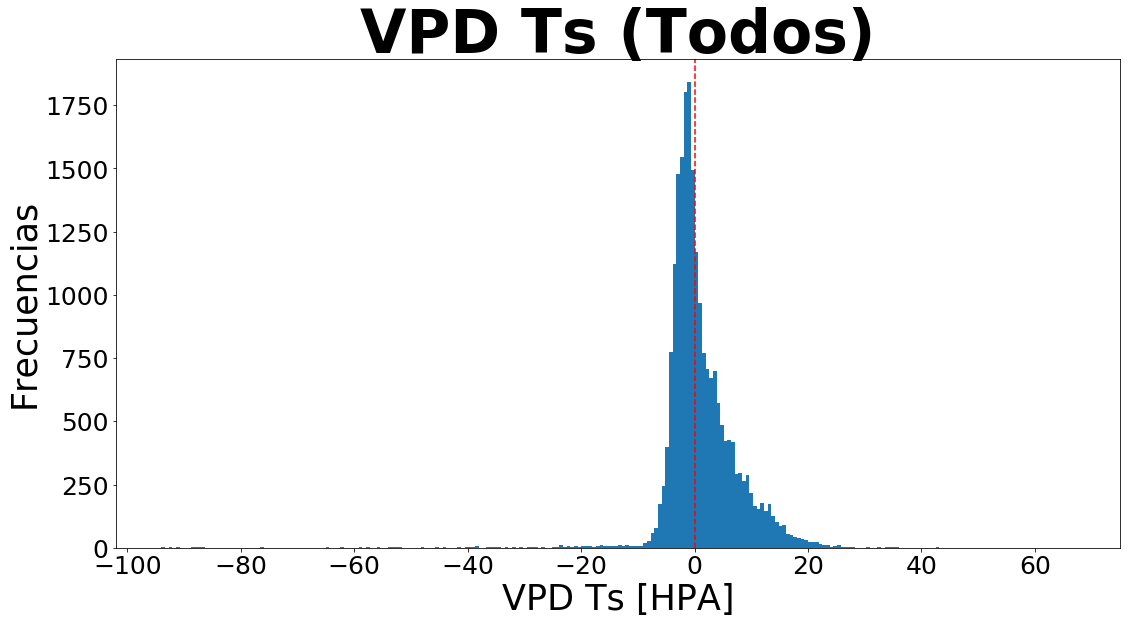

In [9]:
plt.figure(figsize = (18, 9))
plt.hist(datos_juntos['VPD Ts'], 250)
plt.axvline(0, ls = '--', color = 'red')
metadata('VPD Ts (Todos)', 'VPD Ts [HPA]', 'Frecuencias')

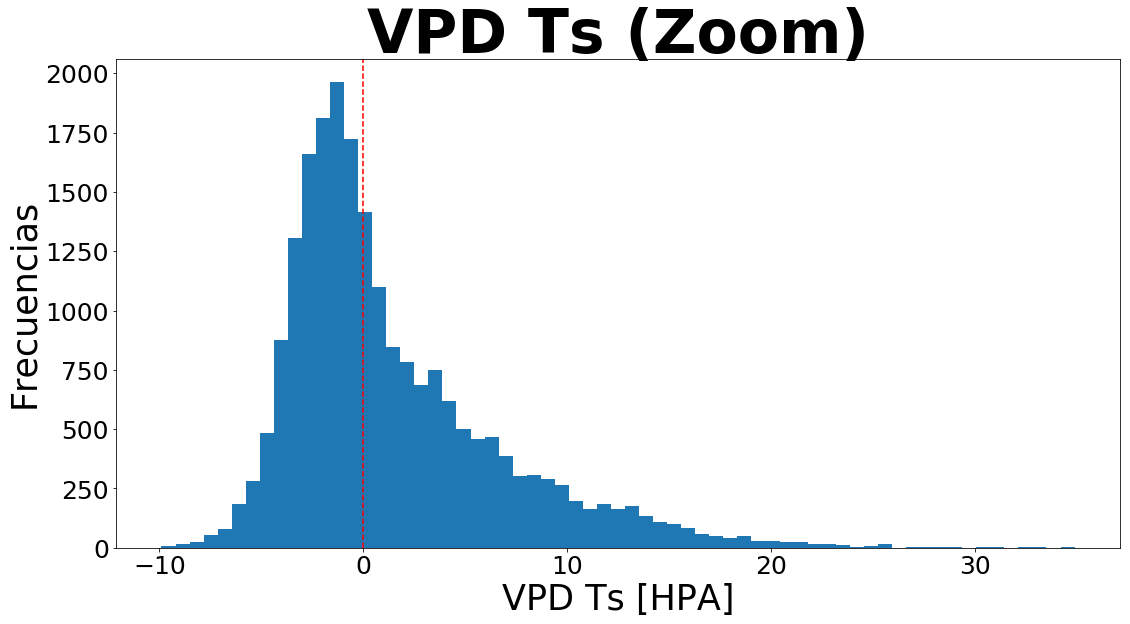

In [10]:
plt.figure(figsize = (18, 9))
plt.hist(eje['VPD Ts'], 65)
plt.axvline(0, ls = '--', color = 'red')
metadata('VPD Ts (Zoom)', 'VPD Ts [HPA]', 'Frecuencias')
# Ojo bines son distintos al gráfico anterior

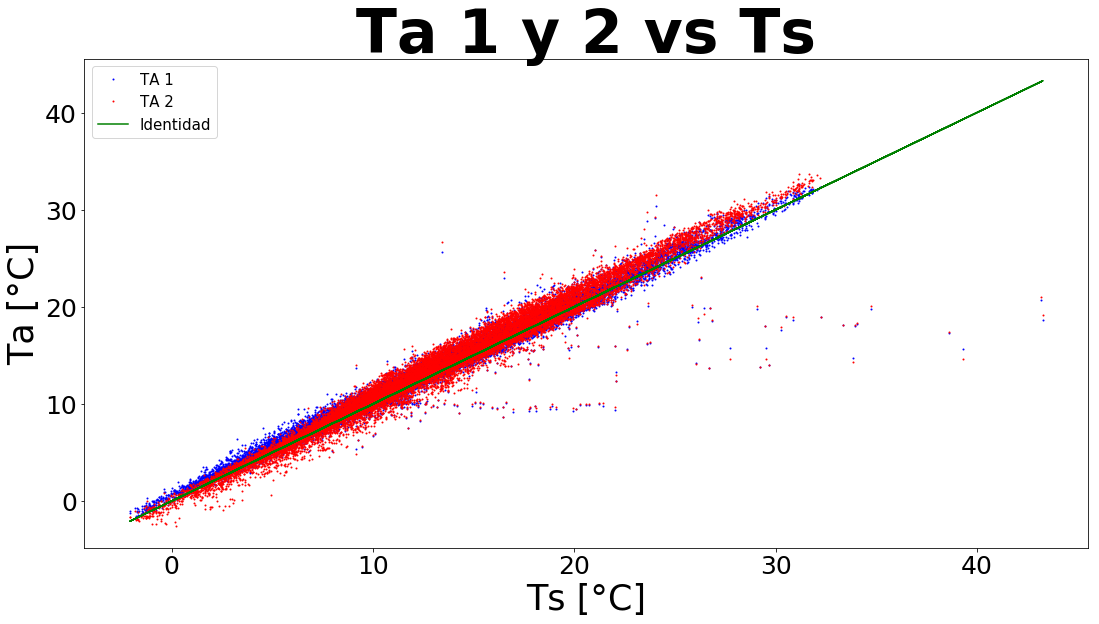

In [7]:
plt.figure(figsize = (18, 9))
plt.plot(datos_juntos['Ts[degC]       '], datos_juntos['TA1'], 'bo', markersize = 1)
plt.plot(datos_juntos['Ts[degC]       '], datos_juntos['TA2'], 'ro', markersize = 1)
plt.plot(datos_juntos['Ts[degC]       '], datos_juntos['Ts[degC]       '], 'g-')
metadata('Ta 1 y 2 vs Ts', 'Ts [°C]', 'Ta [°C]')
plt.legend(['TA 1', 'TA 2', 'Identidad'], fontsize = 15)
plt.savefig('C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Temp.png')

In [8]:
noche_todos = datos_juntos[(datos_juntos['RG'] <= 10)]
dia_todos = datos_juntos[(datos_juntos['RG'] > 10)]
dia_t_seco = dia_todos[(dia_todos['WET'] == 0)]
dia_t_mojado = dia_todos[(dia_todos['WET'] > 0)]
noche_t_seco = noche_todos[(noche_todos['WET'] == 0)]
noche_t_mojado = noche_todos[(noche_todos['WET'] > 0)]
precip_todos = datos_juntos[(datos_juntos['PP'] > 0)]
print('Dia ' + str(dia_todos['RG'].count())
     + '\n Noche ' + str(noche_todos['RG'].count())
     + '\n Dia seco ' + str(dia_t_seco['RG'].count())
     + '\n Dia mojado ' + str(dia_t_mojado['RG'].count())
     + '\n Noche seco ' + str(noche_t_seco['RG'].count())
     + '\n Noche mojado ' + str(noche_t_mojado['RG'].count()) 
     + '\n Precipitacion ' + str(precip_todos['RG'].count())
     )

Dia 11837
 Noche 14247
 Dia seco 8065
 Dia mojado 3772
 Noche seco 2986
 Noche mojado 11261
 Precipitacion 777


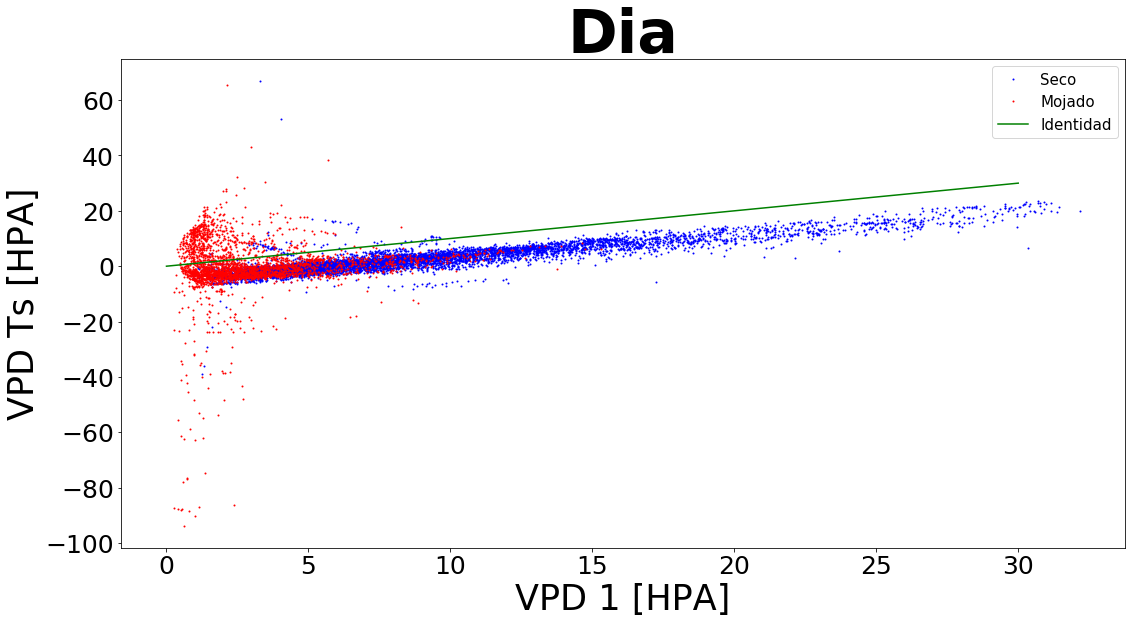

In [9]:
plt.figure(figsize = (18, 9))
plt.plot(dia_t_seco['VPD 1'], dia_t_seco['VPD Ts'], 'bo', markersize = 1)
plt.plot(dia_t_mojado['VPD 1'], dia_t_mojado['VPD Ts'], 'ro', markersize = 1)
plt.plot([0, 30], [0, 30], 'g-')
metadata('Dia', 'VPD 1 [HPA]', 'VPD Ts [HPA]')
plt.legend(['Seco', 'Mojado', 'Identidad'], fontsize = 15)
plt.savefig('C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Dia.png')

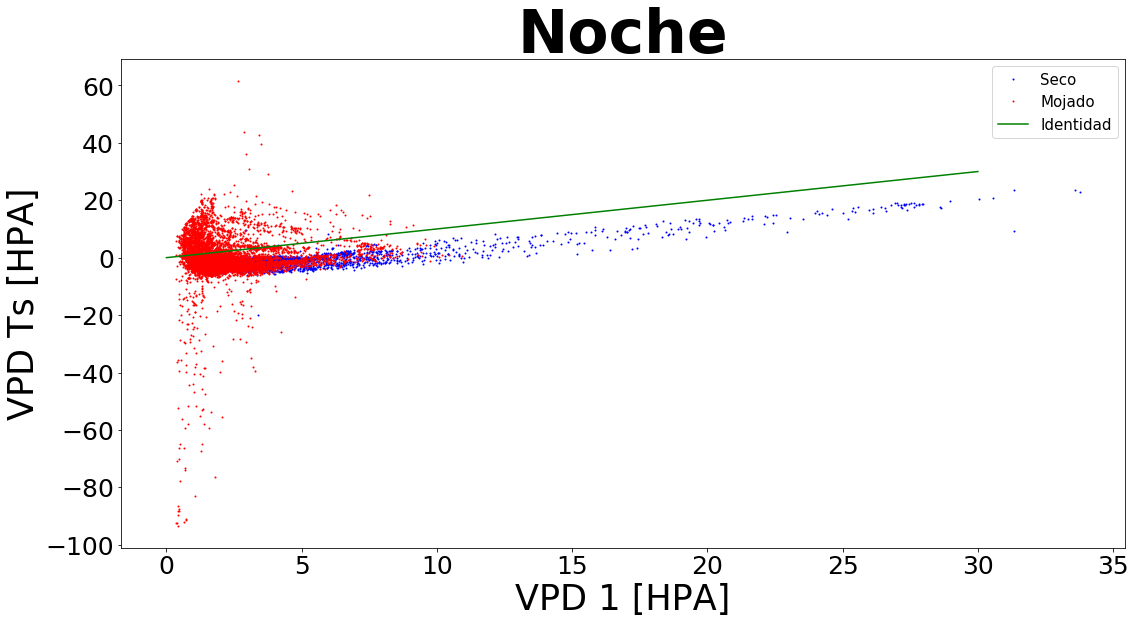

In [10]:
plt.figure(figsize = (18, 9))
plt.plot(noche_t_seco['VPD 1'], noche_t_seco['VPD Ts'], 'bo', markersize = 1)
plt.plot(noche_t_mojado['VPD 1'], noche_t_mojado['VPD Ts'], 'ro', markersize = 1)
plt.plot([0, 30], [0, 30], 'g-')
metadata('Noche', 'VPD 1 [HPA]', 'VPD Ts [HPA]')
plt.legend(['Seco', 'Mojado', 'Identidad'], fontsize = 15)
plt.savefig('C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Noche.png')

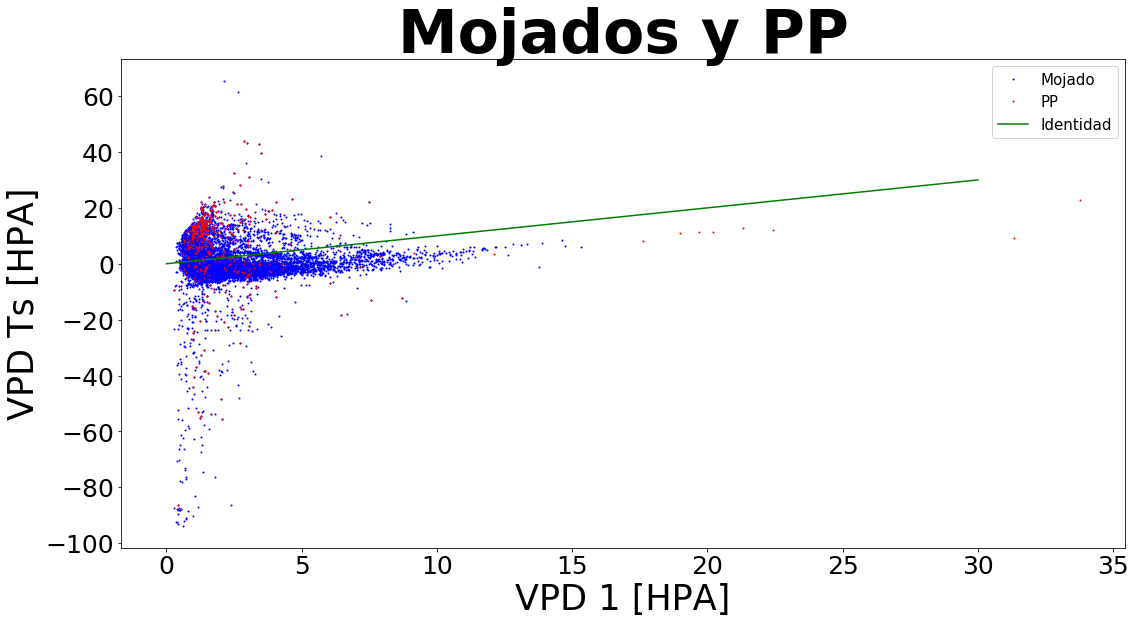

In [11]:
mojado = datos_juntos[(datos_juntos['WET'] > 0)]
plt.figure(figsize = (18, 9))
plt.plot(mojado['VPD 1'], mojado['VPD Ts'], 'bo', markersize = 1)
plt.plot(precip_todos['VPD 1'], precip_todos['VPD Ts'], 'ro', markersize = 1)
plt.plot([0, 30], [0, 30], 'g-')
metadata('Mojados y PP', 'VPD 1 [HPA]', 'VPD Ts [HPA]')
plt.legend(['Mojado', 'PP', 'Identidad'], fontsize = 15)
plt.savefig('C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Mojado.png')

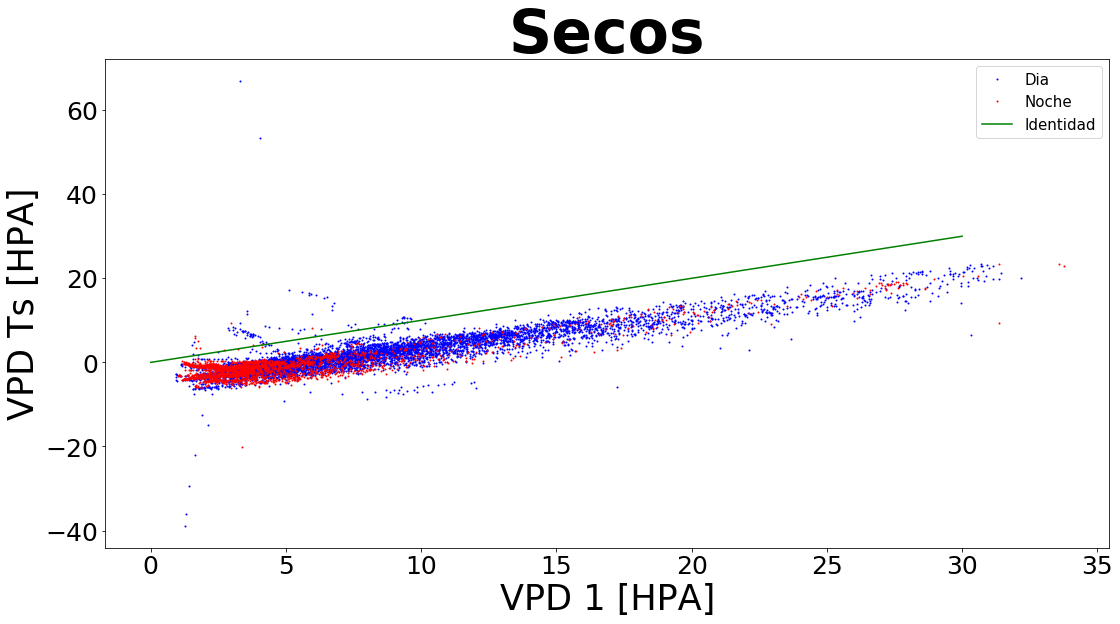

In [12]:
plt.figure(figsize = (18, 9))
plt.plot(dia_t_seco['VPD 1'], dia_t_seco['VPD Ts'], 'bo', markersize = 1)
plt.plot(noche_t_seco['VPD 1'], noche_t_seco['VPD Ts'], 'ro', markersize = 1)
plt.plot([0, 30], [0, 30], 'g-')
metadata('Secos', 'VPD 1 [HPA]', 'VPD Ts [HPA]')
plt.legend(['Dia', 'Noche', 'Identidad'], fontsize = 15)
plt.savefig('C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Seco.png')

In [35]:
mojado.count()

Momento            15033
TSS1               15033
TSS2               15033
TS1                15033
TS2                15033
TS3                15033
TS4                15033
TS_QG              15033
U                  15033
DIR                15033
PP                 15033
TA1                15033
HR1                15033
TA2                15033
HR2                15033
TA3                15033
HR3                15033
TA4                15033
HR4                15033
QG1                15033
QG2                15033
WET                15033
RG                 15033
PAR                14993
TSH1               15033
HS1                15033
GH1                15033
Real(KH)1          15033
Imag(KH)1          15033
Real_T(KH)1        15033
                   ...  
Flag(HTs)          13008
Flag(HTp)          13008
Flag(LvE)          13008
Flag(wCO2)         13008
          T_mid    13008
Fcstor[mmol/m2s    10593
  NEE[mmol/m2s]     7297
Ftprnt_trgt1[%]     9165
Ftprnt_trgt2[%]     9165
